In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.size

900

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# Univariate Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17240\2910737245.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].hist(ax = ax, color = 'green')


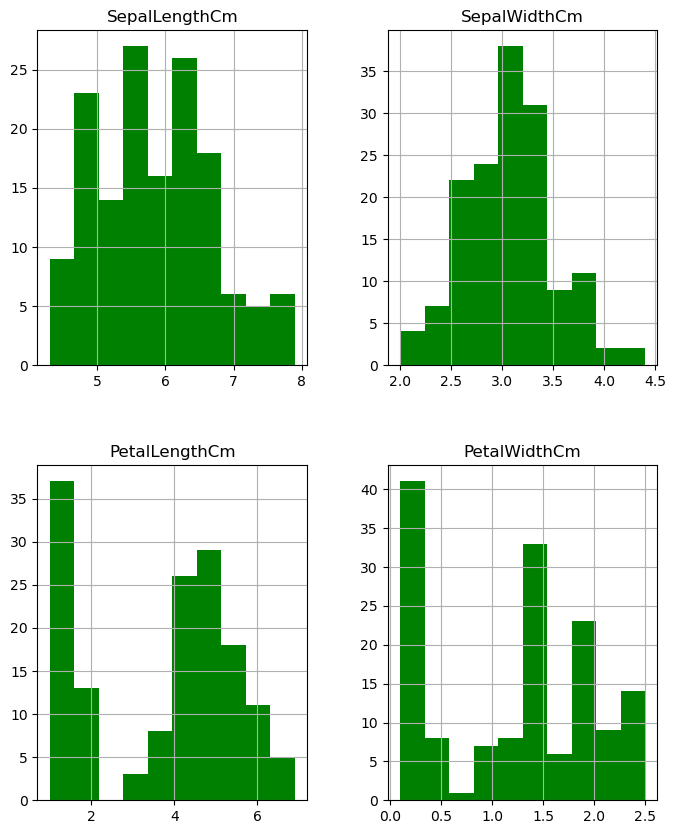

In [16]:
fig = plt.figure(figsize=(8,10))
ax = fig.gca()
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].hist(ax = ax, color = 'green')
plt.show()

# Multivariate Analysis

C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


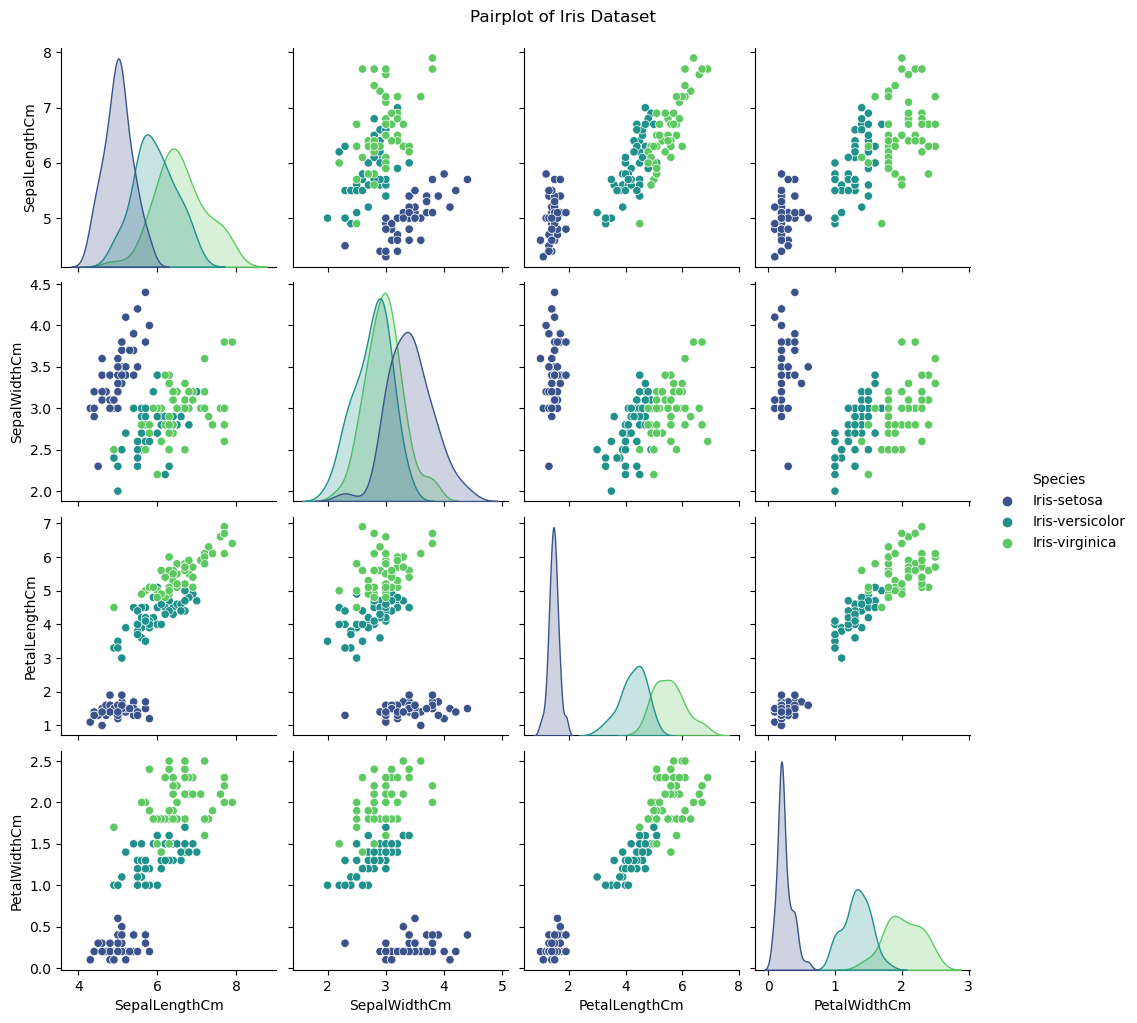

In [24]:
sns.pairplot(df.iloc[:,1:], hue='Species', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

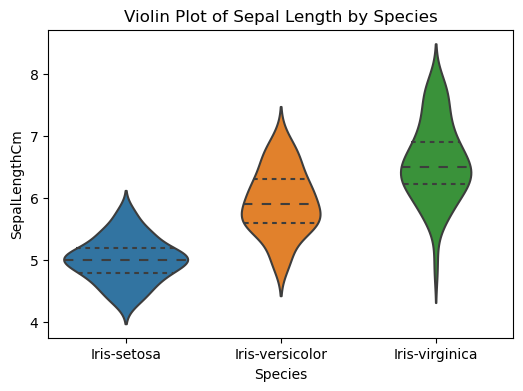

In [30]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Species', y='SepalLengthCm', data=df, inner='quartile')
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

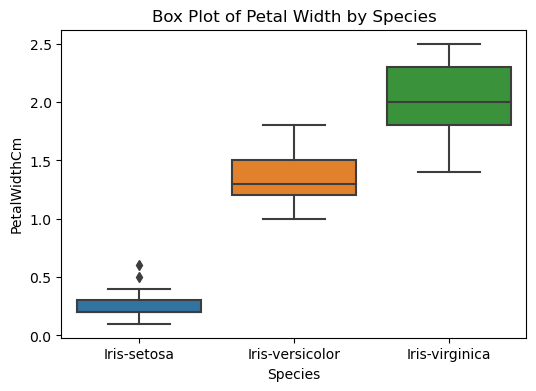

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Box Plot of Petal Width by Species')
plt.show()

<Figure size 600x400 with 0 Axes>

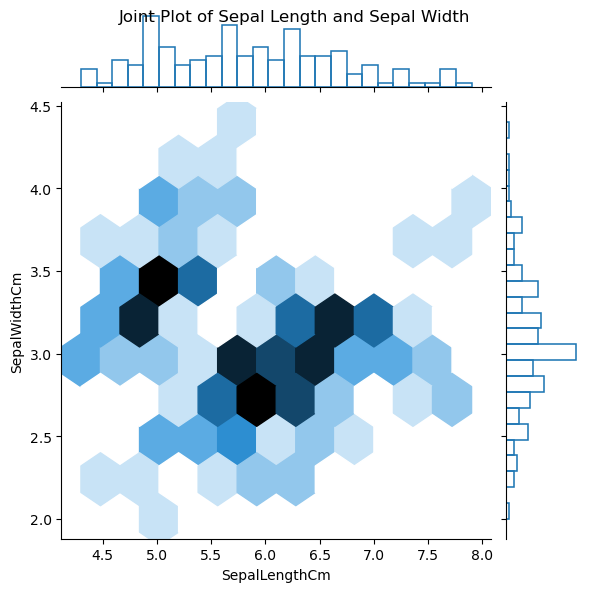

In [34]:
# Joint plot
plt.figure(figsize=(6, 4))
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, kind='hex', marginal_kws=dict(bins=25, fill=False))
plt.suptitle('Joint Plot of Sepal Length and Sepal Width')
plt.show()

<Figure size 600x400 with 0 Axes>

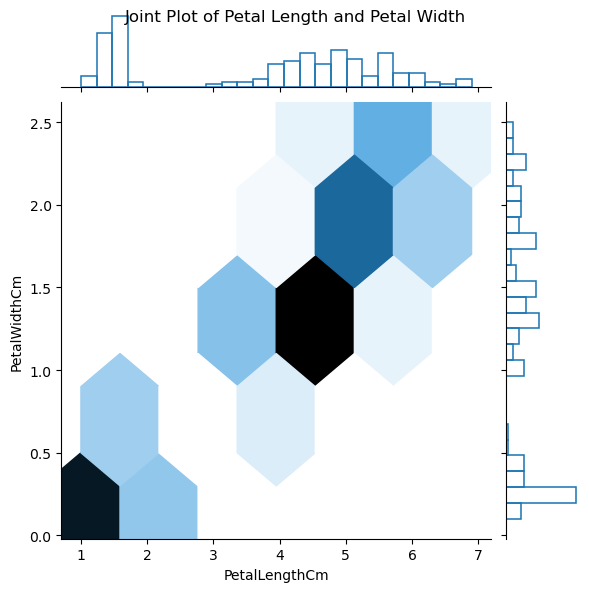

In [35]:
# Joint plot
plt.figure(figsize=(6, 4))
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=df, kind='hex', marginal_kws=dict(bins=25, fill=False))
plt.suptitle('Joint Plot of Petal Length and Petal Width')
plt.show()

# Finding Optimum Number of Clusters using Elbow Method

In [12]:
from sklearn.cluster import KMeans

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df_features = df.iloc[:, 1:-1]

In [15]:
df_features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
# Scaling the  features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_features)

In [17]:
# Initializing within-cluter sum of squares (WCSS) for different values of k

In [18]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

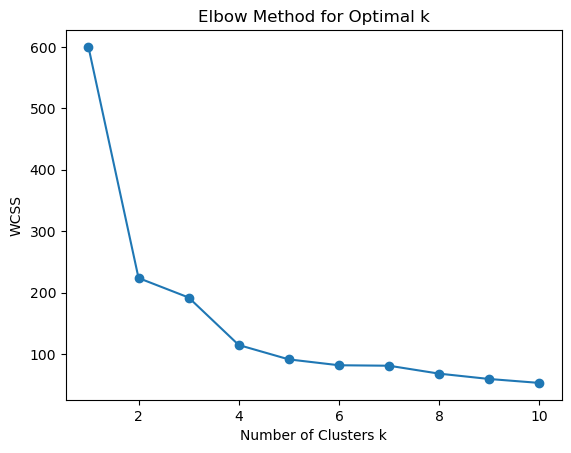

In [19]:
# Plot the elbow curve
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel("Number of Clusters k")
plt.ylabel("WCSS")
plt.show()

In [21]:
optimal_k = 3

# Cluster Visualisation

In [22]:
kmeans = KMeans(n_clusters = optimal_k,random_state = 42)

In [23]:
df['Cluster'] = kmeans.fit_predict(scaled_df)

C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


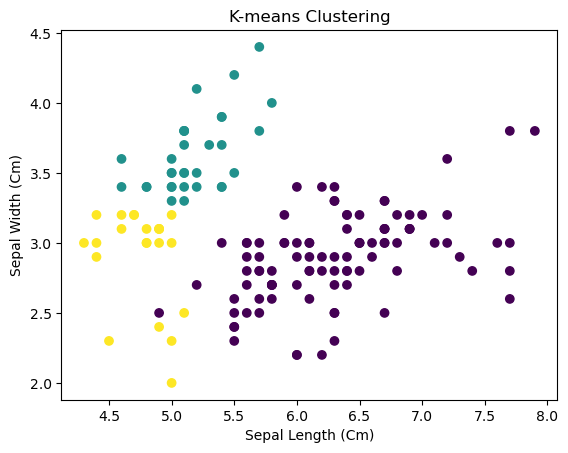

In [24]:
# Visulizing the clusters
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"], c= df['Cluster'], cmap = 'viridis')
plt.title('K-means Clustering')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.show()

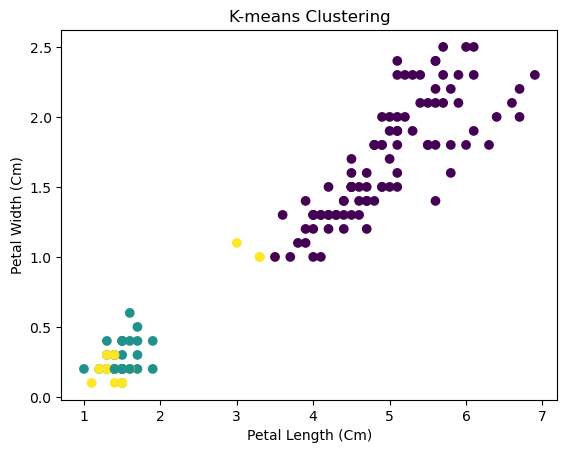

In [25]:
# Visulizing the clusters
plt.scatter(df["PetalLengthCm"],df["PetalWidthCm"], c= df['Cluster'], cmap = 'viridis')
plt.title('K-means Clustering')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.show()